# DATA 608 - Assignment 4: How much do we get paid?

I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

Kaggle Link: https://www.kaggle.com/datasets/juanmerinobermejo/data-jobs-dataset/code

## Load Dependencies

In [47]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

## Data Loading

In [48]:
# load job data pulled from Kaggle's US Data Jobs Salaries Dataset 
job_url = "https://raw.githubusercontent.com/eddiexunyc/data_608_story_4/refs/heads/main/Resources/jobs.csv"
job_data = pd.read_csv(job_url, encoding = "utf-16", error_bad_lines=False).drop(['ID'], axis=1)

# check data type
job_data.dtypes

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_59028/2629541512.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  job_data = pd.read_csv(job_url, encoding = "utf-16", error_bad_lines=False).drop(['ID'], axis=1)


Job                  object
Jobs_Group           object
Profile              object
Remote               object
Company              object
Location             object
City                 object
State                object
Salary               object
Frecuency_Salary     object
Low_Salary          float64
High_Salary         float64
Mean_Salary         float64
Skills               object
dtype: object

In [49]:
# remove Virgin Island and Guams since they are not realy US states
location_remove = ['GU', 'VI', 'PR']
# job_data = job_data.loc[job_data['State'] != 'GU']
job_data = job_data[~job_data['State'].isin(location_remove)]

job_data.head()

,Job,Jobs_Group,Profile,Remote,Company,Location,City,State,Salary,Frecuency_Salary,Low_Salary,High_Salary,Mean_Salary,Skills
0,Business Analyst,Business Analyst,NaN,NaN,CyberCoders,"Torrington, CT 06790",Torrington,CT,"$80,000 - $110,000 por año",año,80000.0,110000.0,95000.0,[]
1,RPA Business Systems Analyst,Business Analyst,NaN,NaN,Amerihealth,"Philadelphia, PA 19107 (City Center East area)...",Philadelphia,PA,NaN,NaN,NaN,NaN,NaN,"['Office', 'SQL', 'Bachelor']"
2,Quantitive Business Analyst - Strategic Data S...,Business Analyst,NaN,NaN,Apple,"Austin, TX+1 location",Austin,TX,NaN,NaN,NaN,NaN,NaN,"['Python', 'SQL', 'Bachelor']"
3,Business Line Product Lifecycle Management (PL...,Business Analyst,Junior,NaN,NXP Semiconductors,"Austin, TX (West Oak Hill area)",Austin,TX,NaN,NaN,NaN,NaN,NaN,['Bachelor']
4,Global Markets Operations Asset Services Ops S...,Operations Analyst,Senior,NaN,Bank of America,"Jacksonville, FL 32246 (Windy Hill area)+4 loc...",Jacksonville,FL,NaN,NaN,NaN,NaN,NaN,['Excel']


## Data Wrangling

In [61]:
#List of states
abbrev2state = {'AK': 'Alaska',
                'AL': 'Alabama',
                'AR': 'Arkansas',
                'AZ': 'Arizona',
                'CA': 'California',
                'CO': 'Colorado',
                'CT': 'Connecticut',
                'DC': 'District of Columbia',
                'DE': 'Delaware',
                'FL': 'Florida',
                'GA': 'Georgia',
                'HI': 'Hawaii',
                'IA': 'Iowa',
                'ID': 'Idaho',
                'IL': 'Illinois',
                'IN': 'Indiana',
                'KS': 'Kansas',
                'KY': 'Kentucky',
                'LA': 'Louisiana',
                'MA': 'Massachusetts',
                'MD': 'Maryland',
                'ME': 'Maine',
                'MI': 'Michigan',
                'MN': 'Minnesota',
                'MO': 'Missouri',
                'MS': 'Mississippi',
                'MT': 'Montana',
                'NC': 'North Carolina',
                'ND': 'North Dakota',
                'NE': 'Nebraska',
                'NH': 'New Hampshire',
                'NJ': 'New Jersey',
                'NM': 'New Mexico',
                'NV': 'Nevada',
                'NY': 'New York',
                'OH': 'Ohio',
                'OK': 'Oklahoma',
                'OR': 'Oregon',
                'PA': 'Pennsylvania',
                'RI': 'Rhode Island',
                'SC': 'South Carolina',
                'SD': 'South Dakota',
                'TN': 'Tennessee',
                'TX': 'Texas',
                'UT': 'Utah',
                'VA': 'Virginia',
                'VT': 'Vermont',
                'WA': 'Washington',
                'WI': 'Wisconsin',
                'WV': 'West Virginia',
                'WY': 'Wyoming'}

# list of job consolidation
job_consolidation = {
    'Analyst': 'Business Analyst',
    'Business Intelligence': 'Business Analyst',
    'Finance': 'Business Analyst',
    'Financial Analyst': 'Business Analyst',
    'Operations Analyst': 'Business Analyst',
    'ML/AI Engineer': 'Data Engineer'}

The dictionary of state names is needed for the state name replacement. The dictionary of job consolidation is needed for combining certain job titles. After reviewing the data set, it appears that there are certain job that does not fit the data practitioner roles. So they need to be removed/filtered.

In [63]:
# find out distinct job groups in the dataframe
unique_job_group_set = set(job_data['Jobs_Group'])
to_remove = ['Others', 'Controller', 'CFO', 'Statistician/Mathemathics']
data_practitioner_jobs_set = [x for x in unique_job_group_set if x not in to_remove]

# filter out other job groups that are not in data practitioners list
job_filtered_data = job_data[job_data['Jobs_Group'].isin(data_practitioner_jobs_set)]

# drop the frequency salary column
job_filtered_data = job_filtered_data.drop(['Frecuency_Salary'], axis=1)

# filter out missing salary and jobs with remote location
job_filtered_data = job_filtered_data[job_filtered_data['Salary'].notnull()]
job_filtered_data = job_filtered_data[job_filtered_data['Remote'] != 'Remote']

# replace with the state with full name and consolidate some job titles
job_filtered_data['State'] = job_filtered_data['State'].replace(abbrev2state) 
job_filtered_data['Jobs_Group'] = job_filtered_data['Jobs_Group'].replace(job_consolidation)

# calculate the mean salary sum group by state and jobs group
job_state_salary_data_average = round(job_filtered_data.groupby(['State', 'Jobs_Group'])['Mean_Salary'].mean(),2).reset_index()
job_state_salary_data_average

,State,Jobs_Group,Mean_Salary
0,Alabama,Business Analyst,86577.53
1,Alabama,Data Analyst,78748.95
2,Alabama,Data Engineer,183589.30
3,Alabama,Data Scientist,119489.64
4,Alaska,Business Analyst,82360.73
...,...,...,...
190,Wisconsin,Data Engineer,103865.75
191,Wisconsin,Data Scientist,93356.67
192,Wyoming,Business Analyst,68888.63
193,Wyoming,Data Analyst,65000.00


## Data Visualization

The term 'Data Practitioners' is growing in popularity in recent decades. Many companies across America offer to pay a decent salary for job positions under that term. As shown below, District of Columbias offer highest salary overall for data practitioner jobs, followed by California and Washington. It appears that both Business and Data Analysts are most popular data practitioner titles as they are being offered in every states. Data Engineer and Data Scientist roles are being less offered in United States where states like Mississippi and South Carolina do not offer those roles at all.

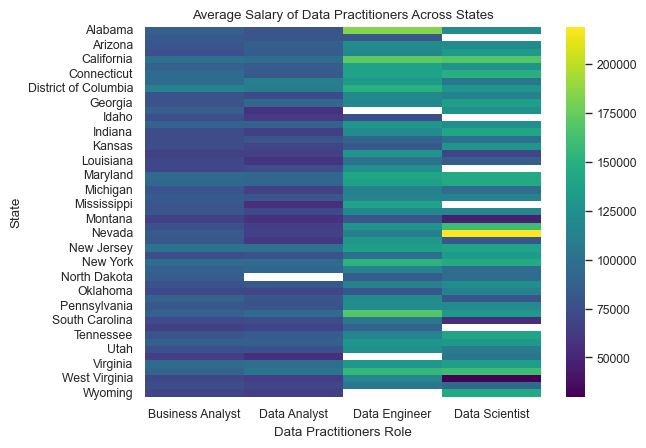

<Figure size 50000x10000 with 0 Axes>

In [69]:
# create a viridis heatmap
ax = sns.heatmap(job_state_salary_data_average.pivot(index = 'State', columns = 'Jobs_Group', values = 'Mean_Salary'), cmap='viridis')
plt.figure(figsize=(500, 100))

# customize both x and y labels
ax.set(xlabel= 'Data Practitioners Role',
       title = 'Average Salary of Data Practitioners Across States')

# show plot
plt.show()